In [53]:
import pandas as pd
import matplotlib.pyplot as plt


In [74]:
# load data from CSV file for data explortion. 

df = pd.read_csv("data/marketing_campaign.csv", sep="\t")

In [ ]:
df.describe()

In [ ]:
# check if any of them has NULL data in the row.
null_row = df[df.isnull().any(axis=1)]
print(null_row)

In [45]:
# 24 rows don't know about customer income. 
# all of these row will analyse later, 
# while don't have income data we can do with other information to know them? 

no_income = df["Income"].isnull().sum()

print(no_income)



24


In [ ]:
noincome = df[df["Income"].isnull()]
edu = noincome["Education"].value_counts()
print(edu)

group of education

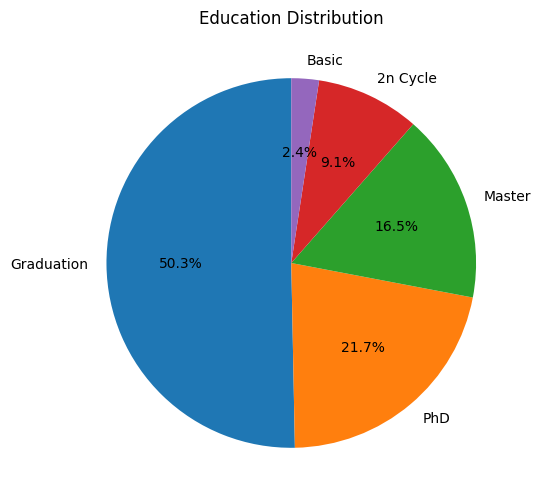

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [55]:
# 1. Get the total number of Education 
total_education = df["Education"].value_counts()

# 2. Plot as pie
total_education.plot.pie(
    autopct="%1.1f%%",   # show percentage with 1 decimal
    startangle=90,       # rotate so first slice is at the top
    ylabel="",           # hide the y-axis label
    figsize=(6, 6)
)

plt.title("Education Distribution")
plt.show()

print(total_education)




Most of people has Graduation education while 22% has PhD, then Master Degree. Only 2.4% has Basic education.

Segment group of customers be education and income.

In [ ]:
df.groupby("Education")["Income"].sum()

Education
2n Cycle       9526638.0
Basic          1096538.0
Graduation    58835937.0
Master        19314900.0
PhD           27005896.0
Name: Income, dtype: float64

In [80]:
# df has "Education" + many Mnt* columns
campaign = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# group by education, sum the money columns
edu_campaign = df.groupby("Education")[campaign].sum()

In [ ]:
print(edu_campaign)

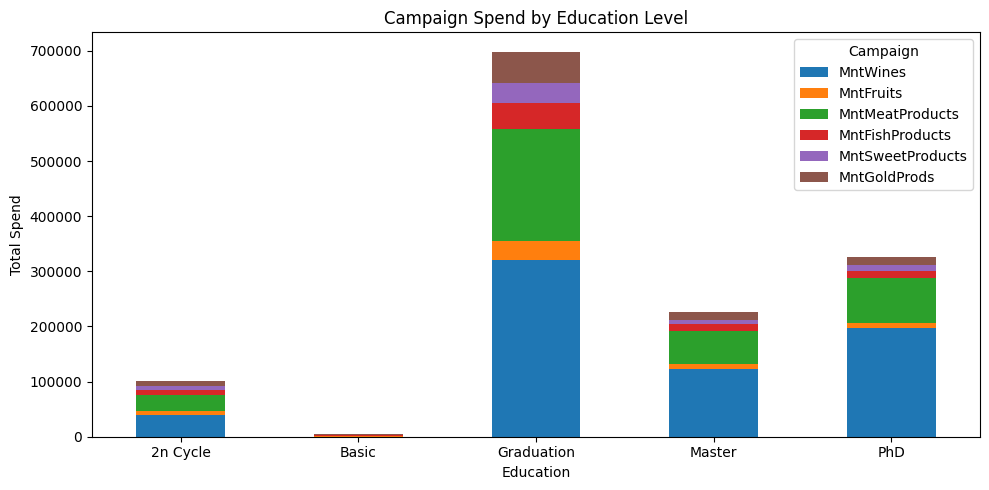

In [ ]:
campaign = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

campaign_by_edu = df.groupby("Education")[campaign].sum()
campaign_by_edu.plot(kind="bar", stacked=True, figsize=(10,5))
plt.title("Campaign Spend by Education Level")
plt.ylabel("Total Spend")
plt.xticks(rotation=0)
plt.legend(title="Campaign")
plt.tight_layout()
plt.show()

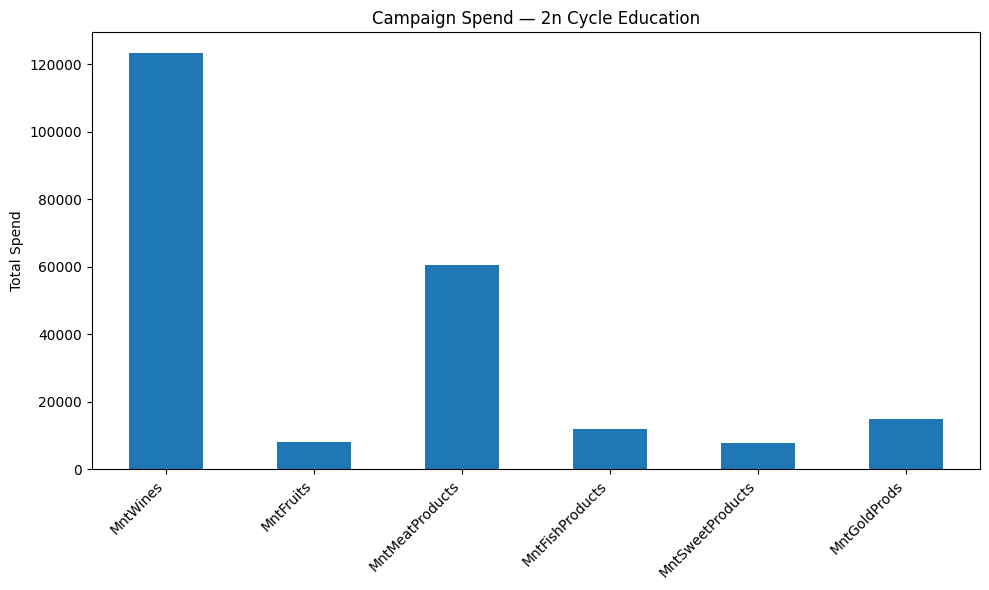

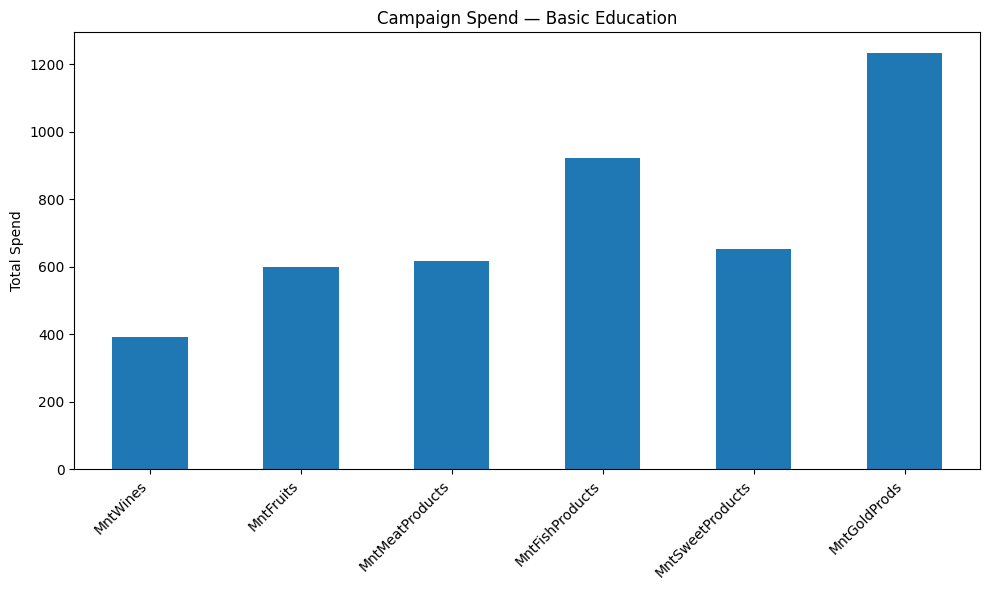

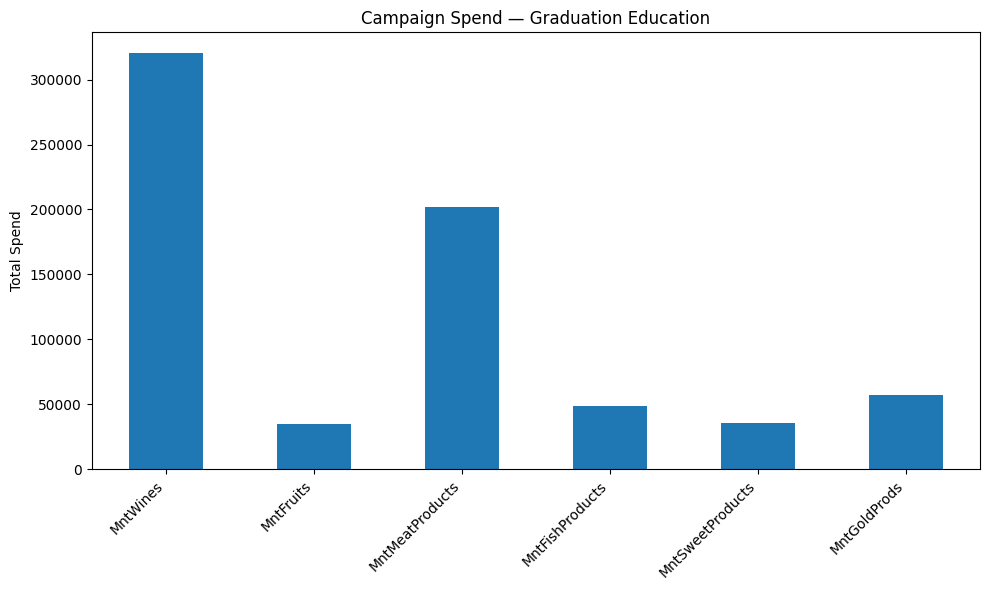

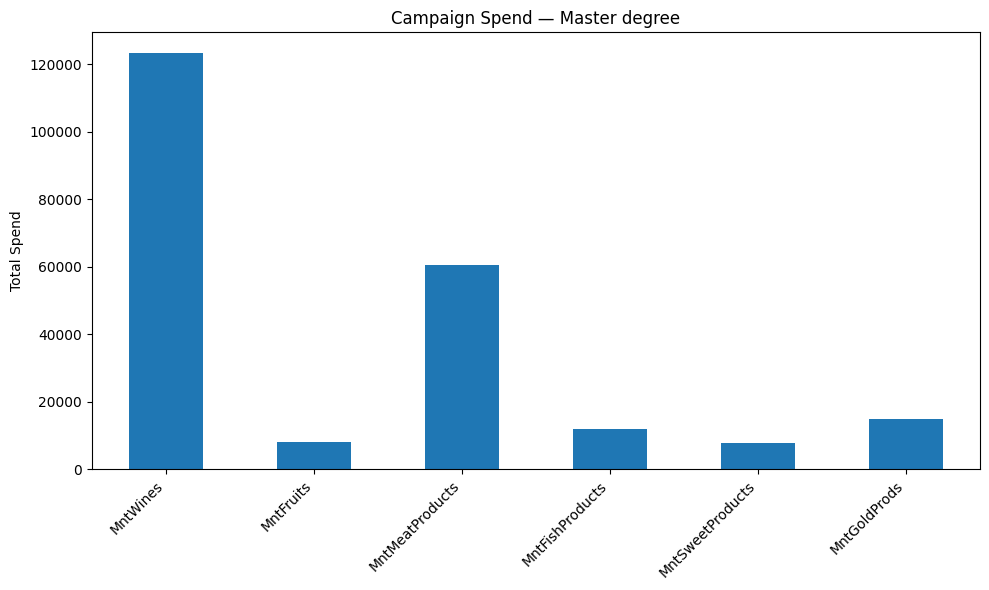

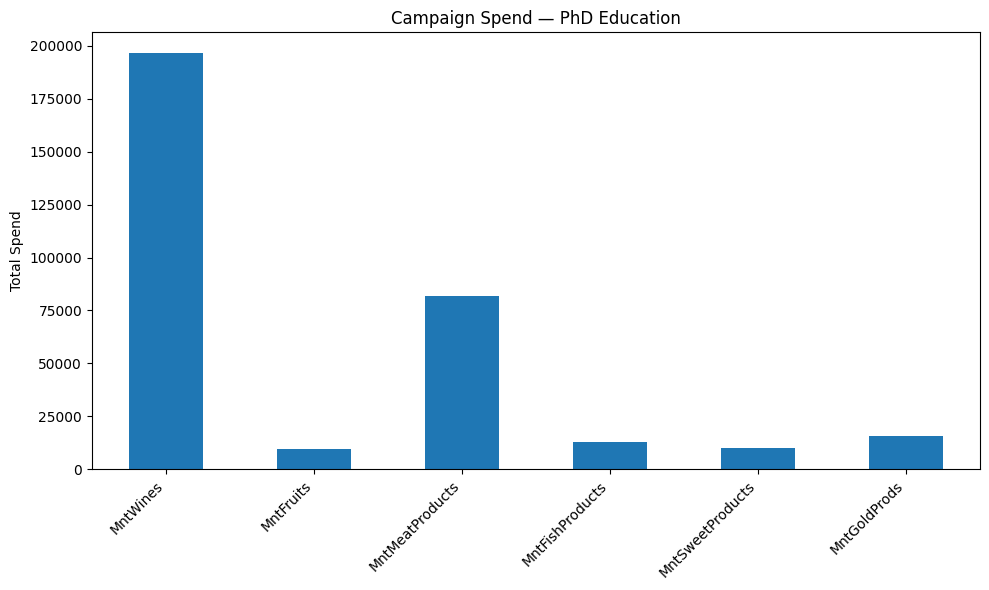

In [103]:
campaign = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# filter rows where Education == "Master"
tn_df = df[df["Education"] == "2n Cycle"]
basic_df = df[df["Education"] == "Basic"]
graduation_df = df[df["Education"] == "Graduation"]
master_df = df[df["Education"] == "Master"]
phd_df = df[df["Education"] == "PhD"]

# sum spending across all "Master" rows
tn_df_spend = tn_df[campaign].sum()
basic_spend = basic_df[campaign].sum()
graduation_spend = graduation_df[campaign].sum()
master_spend = master_df[campaign].sum()
phd_spend = phd_df[campaign].sum()


# bar chart for customer who has a 2n Cycle education
plt.figure(figsize=(10,6))
master_spend.plot(kind="bar")
plt.title("Campaign Spend — 2n Cycle Education")
plt.ylabel("Total Spend")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# bar chart for customer who has a Basic education
plt.figure(figsize=(10,6))
basic_spend.plot(kind="bar")
plt.title("Campaign Spend — Basic Education")
plt.ylabel("Total Spend")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# bar chart for customer who has a Graduation education
plt.figure(figsize=(10,6))
graduation_spend.plot(kind="bar")
plt.title("Campaign Spend — Graduation Education")
plt.ylabel("Total Spend")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# bar chart for customer who has a Master degree education
plt.figure(figsize=(10, 6))
master_spend.plot(kind="bar")
plt.title("Campaign Spend — Master degree")
plt.ylabel("Total Spend")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# bar chart for customer who has a PhD education
plt.figure(figsize=(10, 6))
phd_spend.plot(kind="bar")
plt.title("Campaign Spend — PhD Education")
plt.ylabel("Total Spend")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()